### import package and set directory

In [102]:
import os
import scanpy as sc
import pandas as pd
import seaborn as sns
from scipy.stats import normaltest

import pingouin as pg

import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [4]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

# Read in the data

In [5]:
# read in data
data = sc.read_h5ad('NRclean_clustered.h5ad')

In [6]:
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]

data_DC1 = data_P[data_P.obs["NR_annotations_simple"] == "cDC1"]
data_DC2 = data_P[data_P.obs["NR_annotations_simple"] == "cDC2"]
data_mregDC = data_P[data_P.obs["NR_annotations_simple"] == "mregDC"]

# Import KEGG sets

In [7]:
os.chdir('/scratch/user/s4436039/scdata/Pathway-sets')
K_sets = pd.read_excel("kegg_sets.xlsx", sheet_name=None)
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')

In [8]:
# Print the sheet names
print(K_sets.keys())

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5', 'Sheet6', 'Sheet7', 'Sheet8', 'Sheet9', 'Sheet10', 'Sheet11', 'Sheet12', 'Sheet13', 'Sheet14', 'Sheet15', 'Sheet16', 'Sheet17', 'Sheet18', 'Sheet19', 'Sheet20', 'Sheet21', 'Sheet22', 'Sheet23', 'Sheet24', 'Sheet25', 'Sheet26', 'Sheet27', 'Sheet28', 'Sheet29', 'Sheet30', 'Sheet31', 'Sheet32', 'Sheet33', 'Sheet34', 'Sheet35', 'Sheet36', 'Sheet37', 'Sheet38', 'Sheet39', 'Sheet40', 'Sheet41', 'Sheet42', 'Sheet43', 'Sheet44', 'Sheet45', 'Sheet46', 'Sheet47', 'Sheet48', 'Sheet49', 'Sheet50', 'Sheet51', 'Sheet52', 'Sheet53', 'Sheet54', 'Sheet55', 'Sheet56', 'Sheet57', 'Sheet58', 'Sheet59', 'Sheet60', 'Sheet61', 'Sheet62', 'Sheet63', 'Sheet64', 'Sheet65', 'Sheet66', 'Sheet67', 'Sheet68', 'Sheet69', 'Sheet70', 'Sheet71', 'Sheet72', 'Sheet73', 'Sheet74', 'Sheet75', 'Sheet76', 'Sheet77', 'Sheet78', 'Sheet79', 'Sheet80', 'Sheet81', 'Sheet82', 'Sheet83', 'Sheet84', 'Sheet85', 'Sheet86', 'Sheet87', 'Sheet88', 'Sheet89', 'Sheet90', 'Sheet91

In [9]:
# Change keys to be gene set name (the first value in the 'gs_name' column) instead of Sheet1 etc 
K_sets2 = {df["gs_name"].iloc[0]: df for _, df in K_sets.items()}
K_sets = K_sets2

# Result
print(K_sets.keys())

dict_keys(['KEGG_ABC_TRANSPORTERS', 'KEGG_ACUTE_MYELOID_LEUKEMIA', 'KEGG_ADHERENS_JUNCTION', 'KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY', 'KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM', 'KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION', 'KEGG_ALLOGRAFT_REJECTION', 'KEGG_ALPHA_LINOLENIC_ACID_METABOLISM', 'KEGG_ALZHEIMERS_DISEASE', 'KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM', 'KEGG_AMINOACYL_TRNA_BIOSYNTHESIS', 'KEGG_AMYOTROPHIC_LATERAL_SCLEROSIS_ALS', 'KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION', 'KEGG_APOPTOSIS', 'KEGG_ARACHIDONIC_ACID_METABOLISM', 'KEGG_ARGININE_AND_PROLINE_METABOLISM', 'KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC', 'KEGG_ASCORBATE_AND_ALDARATE_METABOLISM', 'KEGG_ASTHMA', 'KEGG_AUTOIMMUNE_THYROID_DISEASE', 'KEGG_AXON_GUIDANCE', 'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY', 'KEGG_BASAL_CELL_CARCINOMA', 'KEGG_BASAL_TRANSCRIPTION_FACTORS', 'KEGG_BASE_EXCISION_REPAIR', 'KEGG_BETA_ALANINE_METABOLISM', 'KEGG_BIOSYNTHESIS_OF_UNSATURATED_FATTY_ACIDS', 'KEGG_BLADDE

In [10]:
# Keys to include in new dictionary
keys_include = ["KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY",
"KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION",
"KEGG_APOPTOSIS",
"KEGG_CALCIUM_SIGNALING_PATHWAY",
"KEGG_CELL_ADHESION_MOLECULES_CAMS",
"KEGG_CHEMOKINE_SIGNALING_PATHWAY",
"KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION",
"KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY",
"KEGG_ENDOCYTOSIS",
"KEGG_FATTY_ACID_METABOLISM",
"KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS",
"KEGG_GLYCOLYSIS_GLUCONEOGENESIS",
"KEGG_JAK_STAT_SIGNALING_PATHWAY",
"KEGG_MAPK_SIGNALING_PATHWAY",
"KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY",
"KEGG_NOTCH_SIGNALING_PATHWAY",
"KEGG_OXIDATIVE_PHOSPHORYLATION",
"KEGG_PROTEASOME",
"KEGG_PROTEIN_EXPORT",
"KEGG_TGF_BETA_SIGNALING_PATHWAY",
"KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY",
"KEGG_TYROSINE_METABOLISM",
"KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS",
"KEGG_VEGF_SIGNALING_PATHWAY"]

In [13]:
# create a new dictionary with select keys (pathway sets)
K_sets_sub = {key: K_sets[key] for key in keys_include if key in K_sets}

In [12]:
print(K_sets_sub.keys())

dict_keys(['KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY', 'KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION', 'KEGG_APOPTOSIS', 'KEGG_CALCIUM_SIGNALING_PATHWAY', 'KEGG_CELL_ADHESION_MOLECULES_CAMS', 'KEGG_CHEMOKINE_SIGNALING_PATHWAY', 'KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION', 'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY', 'KEGG_ENDOCYTOSIS', 'KEGG_FATTY_ACID_METABOLISM', 'KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS', 'KEGG_GLYCOLYSIS_GLUCONEOGENESIS', 'KEGG_JAK_STAT_SIGNALING_PATHWAY', 'KEGG_MAPK_SIGNALING_PATHWAY', 'KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY', 'KEGG_NOTCH_SIGNALING_PATHWAY', 'KEGG_OXIDATIVE_PHOSPHORYLATION', 'KEGG_PROTEASOME', 'KEGG_PROTEIN_EXPORT', 'KEGG_TGF_BETA_SIGNALING_PATHWAY', 'KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY', 'KEGG_TYROSINE_METABOLISM', 'KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS', 'KEGG_VEGF_SIGNALING_PATHWAY'])


In [14]:
adipocytokine_df = K_sets_sub["KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY"]
adipocytokine_genes = adipocytokine_df["human_gene_symbol"]
adipocytokine_list = adipocytokine_genes.tolist()

In [15]:
#score DC for gene set:
sc.tl.score_genes(data_DC1, gene_list=adipocytokine_list, score_name=f"adipocytokine_score")
sc.tl.score_genes(data_DC2, gene_list=adipocytokine_list, score_name=f"adipocytokine_score")
sc.tl.score_genes(data_mregDC, gene_list=adipocytokine_list, score_name=f"adipocytokine_score")

       'PRKAG3'],
      dtype='object')
       'PRKAG3'],
      dtype='object')


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


       'PRKAG3'],
      dtype='object')


/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_score_genes.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


In [ ]:
score_column = "adipocytokine_score"

In [151]:
custom_order = ['HGSOC','Acral Melanoma','Breast Cancer','CRC','GAC','GBM','HCC','HNSCC','Melanoma','NPC','NSCLC','PDAC','iCCA']

## generate scores and export to excel for prism

### DC1

In [ ]:
# Group by 'integration_id' and calculate the mean score for each group
score_DC1 = data_DC1.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_type_broad' by matching the 'integration_id'
score_DC1 = score_DC1.merge(
    data_DC1.obs[["integration_id", "cancer_type_broad", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC1['replicate'] = score_DC1.groupby('cancer_type_broad').cumcount()
pivoted_df_DC1 = score_DC1.pivot(index='cancer_type_broad', columns='replicate', values='adipocytokine_score')
# Reindex the rows based on custom order
pivoted_df_DC1 = pivoted_df_DC1.reindex(custom_order)
pivoted_df_DC1.shape

/scratch/temp/11894104/ipykernel_2945541/1118147617.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_DC1 = data_DC1.obs.groupby("integration_id")[score_column].mean().reset_index()
/scratch/temp/11894104/ipykernel_2945541/1118147617.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_DC1['replicate'] = score_DC1.groupby('cancer_type_broad').cumcount()


(13, 96)

### DC2:

In [ ]:
# Group by 'integration_id' and calculate the mean score for each group
score_DC2 = data_DC2.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_type_broad' by matching the 'integration_id'
score_DC2 = score_DC2.merge(
    data_DC2.obs[["integration_id", "cancer_type_broad", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_DC2['replicate'] = score_DC2.groupby('cancer_type_broad').cumcount()
pivoted_df_DC2 = score_DC2.pivot(index='cancer_type_broad', columns='replicate', values='adipocytokine_score')
# Reindex the rows based on custom order
pivoted_df_DC2 = pivoted_df_DC2.reindex(custom_order)
pivoted_df_DC2.shape

/scratch/temp/11894104/ipykernel_2945541/1451442245.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_DC2 = data_DC2.obs.groupby("integration_id")[score_column].mean().reset_index()
/scratch/temp/11894104/ipykernel_2945541/1451442245.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_DC2['replicate'] = score_DC2.groupby('cancer_type_broad').cumcount()


(13, 98)

### mregDC:

In [ ]:
# Group by 'integration_id' and calculate the mean score for each group
score_mregDC = data_mregDC.obs.groupby("integration_id")[score_column].mean().reset_index()

# Merge with 'cancer_type_broad' by matching the 'integration_id'
score_mregDC = score_mregDC.merge(
    data_mregDC.obs[["integration_id", "cancer_type_broad", "NR_annotations_simple"]].drop_duplicates(),
    on="integration_id",
    how="left"
)

# convert to layout for prism (cancer types as rows with replicates as columns)
score_mregDC['replicate'] = score_mregDC.groupby('cancer_type_broad').cumcount()
pivoted_df_mregDC = score_mregDC.pivot(index='cancer_type_broad', columns='replicate', values='adipocytokine_score')
# Reindex the rows based on custom order
pivoted_df_mregDC = pivoted_df_mregDC.reindex(custom_order)
pivoted_df_mregDC.shape

/scratch/temp/11894104/ipykernel_2945541/3433637666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_mregDC = data_mregDC.obs.groupby("integration_id")[score_column].mean().reset_index()
/scratch/temp/11894104/ipykernel_2945541/3433637666.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_mregDC['replicate'] = score_mregDC.groupby('cancer_type_broad').cumcount()


(13, 97)

### Export to excel

In [139]:
with pd.ExcelWriter('Adipocytokine.xlsx') as writer:
    pivoted_df_DC1.to_excel(writer, sheet_name='DC1')
    pivoted_df_DC2.to_excel(writer, sheet_name='DC2')
    pivoted_df_mregDC.to_excel(writer, sheet_name='mregDC')

# Normality test
* based on D'Agostino and Pearson's test
* if normal: do one-way anova and Tukeys multiple comparisons
* if not normal: do Kruskal-Wallis with Dunn's test for multiple comparisons

In [ ]:
print("Adipocytokine: ", normaltest(sample_scores_df["adipocytokine_score"]).pvalue)

Adipocytokine:  5.943422902767891e-28


In [ ]:
print(pg.normality(sample_scores_df))

                            W          pval  normal
adipocytokine_score  0.900184  5.405815e-14   False


# Kruskal Wallis test with Dunn's Test

In [32]:
# Perform Kruskal-Wallis test
kruskal_results = pg.kruskal(data=sample_scores_df, dv='adipocytokine_score', between='cancer_type_broad')

print("Kruskal-Wallis Test Results:")
print(kruskal_results)

Kruskal-Wallis Test Results:
                    Source  ddof1          H     p-unc
Kruskal  cancer_type_broad     12  38.043434  0.000151


In [40]:
import scikit_posthocs as sp

In [105]:
# Perform Dunn's test
dunn_results = sp.posthoc_dunn(
    sample_scores_df,
    val_col='adipocytokine_score',  # Column with the scores
    group_col='cancer_type_broad', # Column with the group labels
    p_adjust='bonferroni'          # Adjust p-values
)

dunn_results

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scikit_posthocs/_posthocs.py:368: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scikit_posthocs/_posthocs.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_ranks_avg = x.groupby(_group_col)["ranks"].mean()


,Acral Melanoma,Breast Cancer,CRC,GAC,GBM,HCC,HGSOC,HNSCC,Melanoma,NPC,NSCLC,PDAC,iCCA
Acral Melanoma,1.000000,0.173743,0.098648,1.0,1.000000,0.117243,0.388805,0.933343,1.0,1.0,0.177358,0.162958,1.0
Breast Cancer,0.173743,1.000000,1.000000,1.0,0.004503,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
CRC,0.098648,1.000000,1.000000,1.0,0.062749,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
GAC,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
GBM,1.000000,0.004503,0.062749,1.0,1.000000,0.099816,0.031235,0.205738,1.0,1.0,0.006853,0.092996,1.0
HCC,0.117243,1.000000,1.000000,1.0,0.099816,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
HGSOC,0.388805,1.000000,1.000000,1.0,0.031235,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
HNSCC,0.933343,1.000000,1.000000,1.0,0.205738,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
Melanoma,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
NPC,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0


In [126]:
print(dunn_results < 0.05)

                Acral Melanoma  Breast Cancer    CRC    GAC    GBM    HCC  \
Acral Melanoma           False          False  False  False  False  False   
Breast Cancer            False          False  False  False   True  False   
CRC                      False          False  False  False  False  False   
GAC                      False          False  False  False  False  False   
GBM                      False           True  False  False  False  False   
HCC                      False          False  False  False  False  False   
HGSOC                    False          False  False  False   True  False   
HNSCC                    False          False  False  False  False  False   
Melanoma                 False          False  False  False  False  False   
NPC                      False          False  False  False  False  False   
NSCLC                    False          False  False  False   True  False   
PDAC                     False          False  False  False  False  False   

In [99]:
pairs = [('GBM', 'Breast Cancer'),
         ('HGSOC', 'GBM'),
         ('NSCLC', 'GBM')]

In [118]:
# Prepare p-values for the pairs of interest
annotations = {}
for pair in pairs:
    # Extract the p-value for each pair from dunn_results (row: pair[0], column: pair[1])
    p_val = dunn_results.loc[pair[0], pair[1]]
    
    # Format p-value as a string and add it to the annotations dictionary
    annotations[pair] = f"p = {p_val:.3f}"

In [119]:
annotations

{('GBM', 'Breast Cancer'): 'p = 0.005',
 ('HGSOC', 'GBM'): 'p = 0.031',
 ('NSCLC', 'GBM'): 'p = 0.007'}

/scratch/temp/11894104/ipykernel_2945541/4206527068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_scores_df,


KeyError: 1

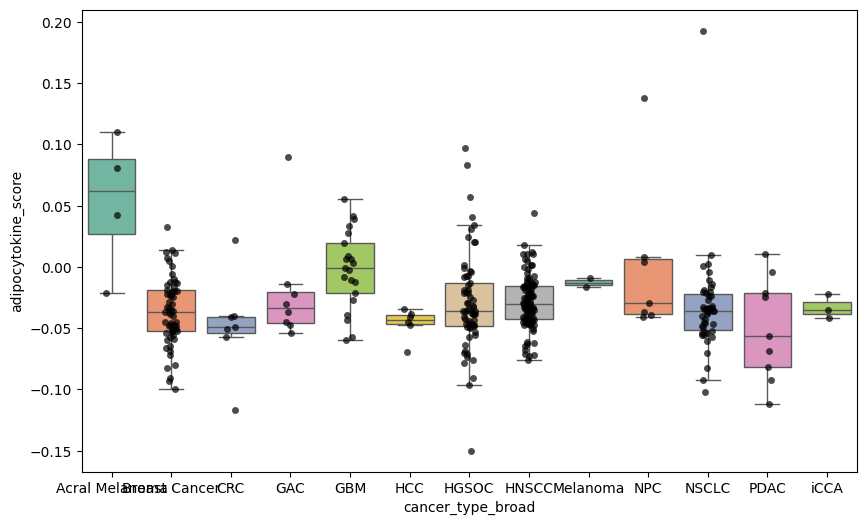

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot
sns.boxplot(data=sample_scores_df, 
            x='cancer_type_broad', 
            y='adipocytokine_score',
            palette = "Set2",
            showfliers=False, 
            ax=ax)

# Overlay individual data points as a scatter (strip plot)
sns.stripplot(data=sample_scores_df,
              x="cancer_type_broad", 
              y="adipocytokine_score",  
              color="black", size=5, jitter=True, alpha=0.7, dodge=True,
              ax=ax)

plotting_parameters = {
    'data':    sample_scores_df,
    'x':       'cancer_type_broad',
    'y':       'adipocytokine_score',
}

annotator = Annotator(ax, pairs, data=sample_scores_df, x='cancer_type_broad', y='adipocytokine_score')
annotator.set_custom_annotations(annotations)
annotator.annotate()

# Optional: Set plot labels and title
ax.set_xlabel('Cancer Type')
ax.set_ylabel('Adipocytokine Score')
ax.set_title('Adipocytokine score per cancer type for cDC1')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot
sns.boxplot(data=sample_scores_df, 
            x='cancer_type_broad', 
            y='adipocytokine_score',
            palette = "Set2",
            showfliers=False, 
            ax=ax)

annotator = Annotator(ax, pairs, data=sample_scores_df, x='cancer_type_broad', y='adipocytokine_score')
annotator.set_custom_annotations(annotations)
annotator.annotate()

# Optional: Set plot labels and title
ax.set_xlabel('Cancer Type')
ax.set_ylabel('Adipocytokine Score')
ax.set_title('Adipocytokine score per cancer type for cDC1')
plt.xticks(rotation=90)

# Show the plot
plt.show()

/scratch/temp/11894104/ipykernel_2945541/1857511454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sample_scores_df,


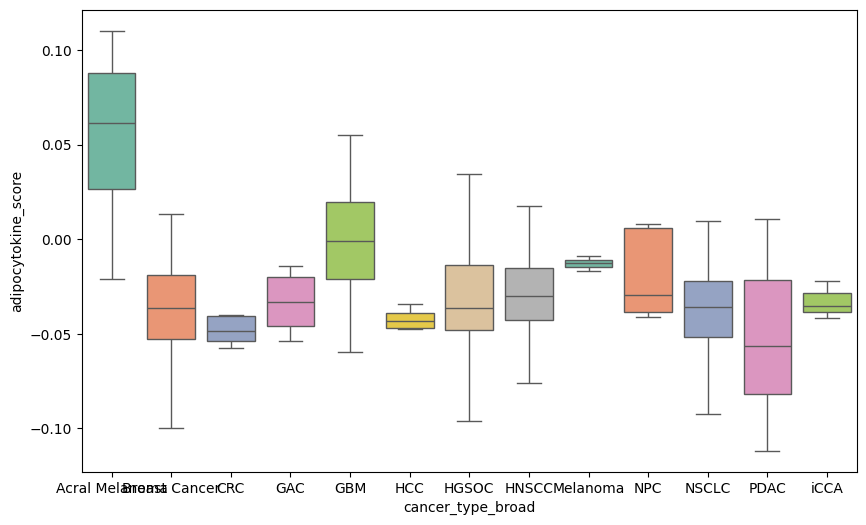

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot
sns.boxplot(data=sample_scores_df, 
            x='cancer_type_broad', 
            y='adipocytokine_score',
            palette = "Set2",
            showfliers=False, 
            ax=ax)

# Show the plot
plt.show()

TypeError: object of type 'numpy.float64' has no len()

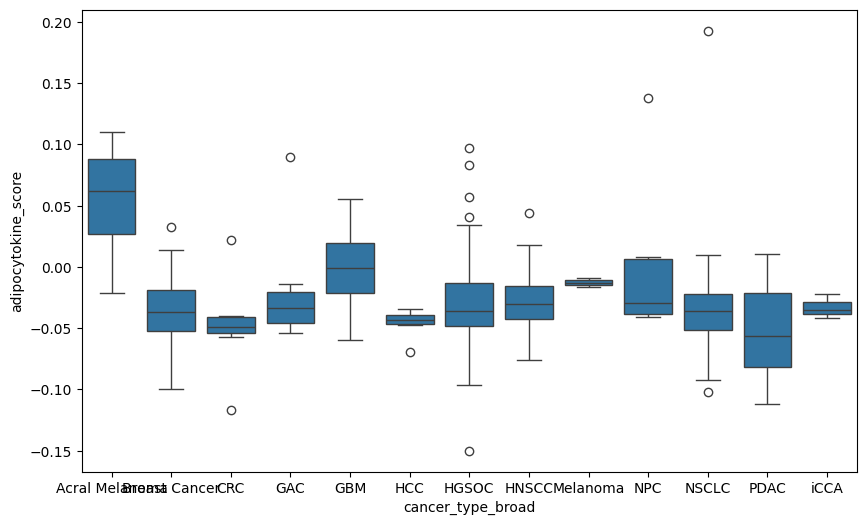

In [116]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='cancer_type_broad', y='adipocytokine_score', data=sample_scores_df)

# 2. Specify the selected comparisons and their corresponding p-values
comparisons = [
    ('HGSOC', 'GBM'),
    ('GBM', 'Breast Cancer'),
    ('NSCLC', 'GBM')
]

# 3. Annotate the plot with p-values from the Dunn's test using Annotator
annotator = Annotator(ax, pairs=comparisons, data=sample_scores_df, x='cancer_type_broad', y='adipocytokine_score')

# Add annotations (p-values from Dunn's test)
for cancer1, cancer2 in comparisons:
    p_value = dunn_results.loc[cancer1, cancer2]
    annotator.set_custom_annotations(p_value)

annotator.annotate()

# 4. Final plot formatting
plt.title('Adipocytokine Score by Cancer Type with Dunn\'s Test Annotations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Following tutorial for graphing: 

In [52]:
dataset = pd.read_csv('kickstarter_projects.csv')
dataset.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [62]:
from python_utils import *

In [71]:
import matplotlib.pyplot as plt

In [64]:
tech = dataset.loc[(dataset.Category=='Technology'), :]

In [65]:
rfs = tech.loc[(tech.Subcategory.isin(("Robots", "Flight", "Sound"))), :]

In [74]:
rfs

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
11056,1533748311,Bilibot : an Affordable Robotics Platform,Technology,Robots,United States,2010-12-10 16:06:24,2011-01-19,5000,5665,19,Successful
15196,276100515,"Protei, Open Hardware Oil Spill Cleaning Saili...",Technology,Robots,United States,2011-02-28 02:47:34,2011-04-12,27500,33796,331,Successful
16709,692625590,BarBot 2011 - Robots Need YOU!,Technology,Robots,United States,2011-03-22 23:43:39,2011-04-02,743,861,28,Successful
17162,528924747,Scout- the Autonomous Transatlantic Boat,Technology,Robots,United States,2011-03-30 20:15:42,2011-05-09,2500,3424,73,Successful
17175,496282362,Digital Modular Theremin,Technology,Sound,United States,2011-03-30 21:27:34,2011-05-29,1025,1140,24,Successful
...,...,...,...,...,...,...,...,...,...,...,...
373770,753056989,LOBEBEATZ The first ever Wireless gauged speak...,Technology,Sound,United States,2017-12-16 17:44:18,2018-01-15,15000,755,10,Live
374017,1649709990,XUFOY GO Guitar Pick / Plectrum for fast playing,Technology,Sound,Germany,2017-12-19 20:40:03,2018-01-08,2670,1251,56,Live
374078,1889158145,PITTA - Transformative Autonomous 4K Selfie Drone,Technology,Flight,United States,2017-12-20 15:13:13,2018-02-03,50000,270291,854,Live
374268,2077555302,Synth-a-Seesia,Technology,Sound,United States,2017-12-22 21:58:42,2018-01-21,20000,2225,9,Live


In [66]:
subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
states_palette = sns.color_palette("YlGnBu", n_colors=5)

states_order = ["Successful", "Failed", "Live", "Suspended", "Canceled"]
subcat_order = ['Robots', 'Flight', 'Sound']

In [81]:
with sns.plotting_context("notebook", font_scale=1.4):
    # Create new plot

    # Plot with seaborn
    ax = sns.boxplot(ax=ax)

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney", comparisons_correction="bonferroni")
    _, corrected_results = annotator.apply_and_annotate()

    # Label and show
    add_legend(ax)
    label_plot_for_states(ax)
    plt.show()

NameError: name 'Annotator' is not defined